In [1]:
##### Novelty Analysis #####
#.... The goal of this script is to understand whether conservation science has become more or less novel
#.... To this end, use key words that connote novelty or not
#.... use in conjunction with a Vader sentiment analysis model

In [160]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import statsmodels.api as sm
import nltk
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from collections import defaultdict
import heapq
import math
from textstat import flesch_kincaid_grade
import json


analyzer = SentimentIntensityAnalyzer()

# set the novelty weights
# for vanilla weights, 1 is innovative and -1 is not

novelty_lexicon = {
    # Innovation (value 1)
    "accurate": 1,
    "precise": 1,
    "correct": 1,
    "exact": 1,
    "true": 1,
    "reliable": 1,
    
    "advanced": 1,
    "sophisticated": 1,
    "develop":1,
    "developed": 1,
    "ahead": 1,
    "cutting-edge": 1,
    "innovative": 1,

    "propose":1,
    "introduce" :1,


    "breakthrough": 1,
    "discovery": 1,
    "advancement": 1,
    "leap": 1,
    "progress": 1,

    "creative": 1,
    "imaginative": 1,
    "original": 1,
    "inventive": 1,
    "artistic": 1,
    "ingenious": 1,

    "cutting-edge": 1,
    "leading-edge": 1,
    "state-of-the-art": 1,
    "pioneering": 1,
    "forefront": 1,

    "disruptive": 1,
    "transformative": 1,
    "groundbreaking": 1,
    "radical": 1,

    "discover": 1,
    "find": 1,
    "uncover": 1,
    "detect": 1,
    "unearth": 1,
    "reveal": 1,

    "enhanced": 1,
    "improved": 1,
    "refined": 1,

    "exploratory": 1,
    "investigative": 1,
    "probing": 1,
    "searching": 1,
    "research-oriented": 1,
    "inquisitive": 1,

    "first": 1,
    "initial": 1,
    "primary": 1,
    "earliest": 1,
    "leading": 1,
    "foremost": 1,

    "first-ever": 1,
    "unprecedented": 1,
    "original": 1,
    "unique": 1,
    "pioneer": 1,

    "first-of-its-kind": 1,
    "novel": 1,
    "one-of-a-kind": 1,

    "game-changing": 1,
    "impactful": 1,
    "significant": 1,

    "important": 1,
    "critical": 1,
    "essential": 1,
    "vital": 1,
    "key": 1,

    "improve": 1,
    "upgrade": 1,
    "advance": 1,

    "improvement": 1,
    "enhancement": 1,
    "progress": 1,

    "innovation": 1,
    "creativity": 1,
    "invention": 1,
    "invent":1,
    "novelty": 1,

    "modernized": 1,
    "updated": 1,
    "contemporary": 1,
    "upgraded": 1,

    "novel findings": 1,
    "new discoveries": 1,
    "innovative results": 1,

    "paradigm": 1,
    "framework": 1,
    "example": 1,
    "template": 1,
    "archetype": 1,

    "pioneering": 1,
    "leading": 1,

    "redefining": 1,
    "reshaping": 1,
    "reinventing": 1,
    "reimagining": 1,

    "superior results": 1,
    "better outcomes": 1,
    "advanced results": 1,
    "exceptional outcomes": 1,

    "unique": 1,
    "distinctive": 1,
    "special": 1,
    "rare": 1,

    # Non-Innovation (value -1)
    "adapted": -1,
    "adjusted": -1,
    "altered": -1,

    "basic": -1,
    "fundamental": -1,
    "simple": -1,

    "benchmark": -1,
    "reference": -1,
    "baseline": -1,

    "common": -1,
    "ordinary": -1,
    "typical": -1,

    "comparable results": -1,
    "similar outcomes": -1,

    "confirm": -1,
    "clarify":-1,
    "verify": -1,
    "validate": -1,

    "conventional": -1,
    "traditional": -1,
    "customary": -1,

    "derived from": -1,
    "based on": -1,
    "sourced from": -1,

    "established": -1,
    "proven": -1,

    "existing": -1,
    "current": -1,

    "incremental": -1,
    "gradual": -1,

    "legacy": -1,
    "outdated": -1,

    "limited": -1,
    "restricted": -1,

    "marginal": -1,
    "slight": -1,

    "minimal": -1,
    "small": -1,

    "modified": -1,
    "adjusted": -1,

    "ordinary": -1,
    "normal": -1,

    "revisited": -1,
    "reevaluated": -1,
    "replicate":-1,
    "replicated":-1,

    "reinforces": -1,
    "supports": -1,

    "routine": -1,
    "regular": -1,

    "small-scale": -1,
    "modest": -1,
}


analyzer.lexicon = novelty_lexicon

stop_words = stopwords.words("english")

print(novelty_lexicon)

{'accurate': 1, 'precise': 1, 'correct': 1, 'exact': 1, 'true': 1, 'reliable': 1, 'advanced': 1, 'sophisticated': 1, 'develop': 1, 'developed': 1, 'ahead': 1, 'cutting-edge': 1, 'innovative': 1, 'propose': 1, 'introduce': 1, 'breakthrough': 1, 'discovery': 1, 'advancement': 1, 'leap': 1, 'progress': 1, 'creative': 1, 'imaginative': 1, 'original': 1, 'inventive': 1, 'artistic': 1, 'ingenious': 1, 'leading-edge': 1, 'state-of-the-art': 1, 'pioneering': 1, 'forefront': 1, 'disruptive': 1, 'transformative': 1, 'groundbreaking': 1, 'radical': 1, 'discover': 1, 'find': 1, 'uncover': 1, 'detect': 1, 'unearth': 1, 'reveal': 1, 'enhanced': 1, 'improved': 1, 'refined': 1, 'exploratory': 1, 'investigative': 1, 'probing': 1, 'searching': 1, 'research-oriented': 1, 'inquisitive': 1, 'first': 1, 'initial': 1, 'primary': 1, 'earliest': 1, 'leading': 1, 'foremost': 1, 'first-ever': 1, 'unprecedented': 1, 'unique': 1, 'pioneer': 1, 'first-of-its-kind': 1, 'novel': 1, 'one-of-a-kind': 1, 'game-changing'

In [119]:
# read in df with abstracts and topics 
#bert_results = pd.read_json('/workspaces/conservation-trends/conservation_filtered_bertopic.json')
bert_results = pd.read_json('/workspaces/conservation-trends/popular_probable.json')

In [152]:
inno_words = [word for word in novelty_lexicon if novelty_lexicon[word] == 1]
print(inno_words)
noninno_words = [word for word in novelty_lexicon if novelty_lexicon[word] == -1]
print(noninno_words)

['accurate', 'precise', 'correct', 'exact', 'true', 'reliable', 'advanced', 'sophisticated', 'develop', 'developed', 'ahead', 'cutting-edge', 'innovative', 'propose', 'introduce', 'breakthrough', 'discovery', 'advancement', 'leap', 'progress', 'creative', 'imaginative', 'original', 'inventive', 'artistic', 'ingenious', 'leading-edge', 'state-of-the-art', 'pioneering', 'forefront', 'disruptive', 'transformative', 'groundbreaking', 'radical', 'discover', 'find', 'uncover', 'detect', 'unearth', 'reveal', 'enhanced', 'improved', 'refined', 'exploratory', 'investigative', 'probing', 'searching', 'research-oriented', 'inquisitive', 'first', 'initial', 'primary', 'earliest', 'leading', 'foremost', 'first-ever', 'unprecedented', 'unique', 'pioneer', 'first-of-its-kind', 'novel', 'one-of-a-kind', 'game-changing', 'impactful', 'significant', 'important', 'critical', 'essential', 'vital', 'key', 'improve', 'upgrade', 'advance', 'improvement', 'enhancement', 'innovation', 'creativity', 'invention'

In [120]:
word_dict = defaultdict(int)
for abstract in bert_results['abstract']:
    for word in abstract.split():
        word = word.lower()
        if word not in stop_words:
            word_dict[word] += 1

In [121]:
print(len(word_dict))
heapq.nlargest(100, word_dict.items(), key=lambda x: x[1])


157028


[('species', 19650),
 ('plant', 8972),
 ('results', 6643),
 ('study', 6634),
 ('data', 6360),
 ('may', 6155),
 ('using', 6155),
 ('different', 5697),
 ('effects', 5432),
 ('however,', 5376),
 ('used', 5312),
 ('also', 5157),
 ('diversity', 5139),
 ('two', 5002),
 ('across', 4910),
 ('found', 4749),
 ('environmental', 4537),
 ('fire', 4470),
 ('ecological', 4277),
 ('high', 4241),
 ('population', 4217),
 ('forest', 4039),
 ('soil', 4017),
 ('seed', 4002),
 ('among', 3933),
 ('within', 3901),
 ('higher', 3893),
 ('community', 3888),
 ('important', 3819),
 ('plants', 3761),
 ('use', 3740),
 ('water', 3698),
 ('variation', 3678),
 ('spatial', 3659),
 ('increased', 3535),
 ('model', 3465),
 ('habitat', 3397),
 ('three', 3378),
 ('growth', 3326),
 ('changes', 3256),
 ('populations', 3190),
 ('species.', 3183),
 ('management', 3178),
 ('potential', 3173),
 ('traits', 3166),
 ('number', 3084),
 ('native', 3005),
 ('studies', 3005),
 ('communities', 3002),
 ('one', 2972),
 ('effect', 2928),
 ('

In [122]:
print(bert_results.columns)
print(bert_results.shape)

Index(['title', 'author', 'container-title', 'DOI', 'abstract',
       'published-online', 'year', 'month', 'day', 'topic', 'probability',
       'Name', 'Simple Name'],
      dtype='object')
(13661, 13)


In [123]:
bert_results['innovation'] = bert_results['abstract'].apply(lambda x: analyzer.polarity_scores(x))

In [124]:
bert_results['compound'] = bert_results['innovation'].apply(lambda x: x.get('compound'))

In [125]:
bert_agg = bert_results.groupby('year')['compound'].mean().reset_index()

In [166]:
chart_data = {
    "labels": bert_agg['year'].tolist(),
    "datasets": bert_agg['compound'].tolist()
}

with open('/workspaces/conservation-trends/pretty_inno_year.json', 'w') as file:
    json.dump(chart_data, file, indent=4)

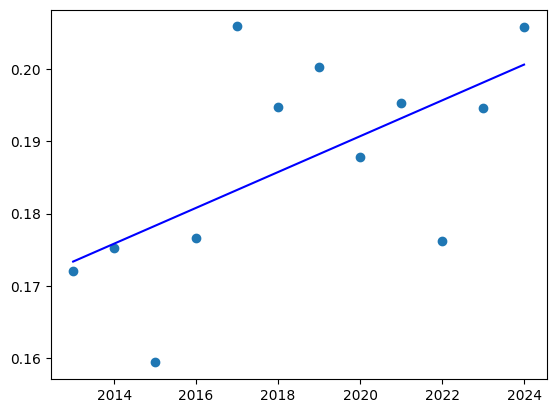

In [126]:
plt.scatter(bert_agg['year'], bert_agg['compound'])
coeffs = np.polyfit(bert_agg['year'], bert_agg['compound'], 1)
trend_line = np.polyval(coeffs, bert_agg['year'])
plt.plot(bert_agg['year'], trend_line, color='blue', label="Trend Line")
plt.show()

In [127]:
X = sm.add_constant(bert_agg['year'])
y = bert_agg['compound']
olsmodel = sm.OLS(y,X).fit()
print(olsmodel.summary())
# the results indicate that significant increases over time despite variability

                            OLS Regression Results                            
Dep. Variable:               compound   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     5.671
Date:                Thu, 21 Nov 2024   Prob (F-statistic):             0.0385
Time:                        18:23:37   Log-Likelihood:                 36.728
No. Observations:                  12   AIC:                            -69.46
Df Residuals:                      10   BIC:                            -68.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8051      2.096     -2.292      0.0

/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.


In [128]:
def format_string(input_string):
    # Step 1: Extract the number prefix and add 1
    match = re.match(r"^(-?\d+)_", input_string)
    if match:
        number = int(match.group(1)) + 1
        # Remove the original number prefix from the string
        rest_of_string = input_string[len(match.group(1)) + 1:]
    else:
        # If there's no number prefix, we can assume the number is 0 and proceed
        number = 1
        rest_of_string = input_string

    # Step 2: Replace underscores with spaces
    rest_of_string = rest_of_string.replace("_", ", ")
    
    # Step 3: Capitalize the first letter of each word
    transformed_string = " ".join(word.capitalize() for word in rest_of_string.split())
    
    # Combine the incremented number with the transformed string
    final_result = f"{number} {transformed_string}"
    
    return final_result

In [129]:
bert_results['pretty_topic'] = bert_results['Name'].apply(lambda x: format_string(x))

In [130]:
bert_results['pretty_topic']

0                  25 Transmission, Disease, Virus, Rabies
1        20 Restoration, Ecological Restoration, Projec...
2            18 Air, Pollution, Air Pollution, Air Quality
3        20 Restoration, Ecological Restoration, Projec...
4                3 Herbivory, Herbivore, Herbivores, Plant
                               ...                        
13656       1 Pollinator, Pollination, Pollinators, Pollen
13657    29 Macroinvertebrate, Beta Diversity, Beta, Me...
13658                       23 Ant, Ants, Ant Species, Efn
13659          68 Camera, Camera Traps, Camera Trap, Traps
13660                  22 Leopard, Lions, Lion, Carnivores
Name: pretty_topic, Length: 13661, dtype: object

In [131]:
# use top 10 topics (previously found)
top10topics = [
     "1 Pollinator, Pollination, Pollinators, Pollen", 
     "2 Fire, Fires, Fuel, Severity",
     "3 Herbivory, Herbivore, Herbivores, Plant",
     "4 Fishing, Fisheries, Catch, Fishery",
     "5 Salmon, Trout, Fish, River",
     "6 Invasive, Invasion, Native, Alien",
     "7 Remote Sensing, Sensing, Remote, Spectral",
     "8 Ha, Yield, Kg, Kg Ha",
     "9 Seed, Seeds, Dispersal, Seed Dispersal",
     "10 Gut, Microbiota, Microbiome, Gut Microbiota",
     "11 Sperm, Males, Mating, Male"
      
]

popular_bert_results = bert_results[bert_results['pretty_topic'].apply(lambda x: x in top10topics)]

print(popular_bert_results)

                                                   title  \
4                        [Game theory and plant ecology]   
10     [A review of Australian tree fern ecology in f...   
14     [Spatial pattern analysis of line‐segment data...   
18     [Comparative methods for chlorophyll detection...   
21        [Analyzing linear spatial features in ecology]   
...                                                  ...   
13650  [Climate and socio‐economic factors explain di...   
13651  [Global application of an unoccupied aerial ve...   
13652  [<scp>CropPol</scp>: A dynamic, open and globa...   
13654         [Assessing changes in global fire regimes]   
13656  [Pollination supply models from a local to glo...   

                                                  author  \
4      [{'given': 'Gordon G.', 'family': 'McNickle', ...   
10     [{'given': 'Shavawn', 'family': 'Donoghue', 's...   
14     [{'ORCID': 'http://orcid.org/0000-0002-1685-31...   
18     [{'name': 'National Research and

In [132]:
topics_inno = popular_bert_results.groupby(['pretty_topic', 'year'])['compound'].mean().reset_index()

/tmp/ipykernel_15192/1026027510.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # Extract p-value for the slope
/tmp/ipykernel_15192/1026027510.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # Extract p-value for the slope
/tmp/ipykernel_15192/1026027510.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # Extract p-value for the slope
/

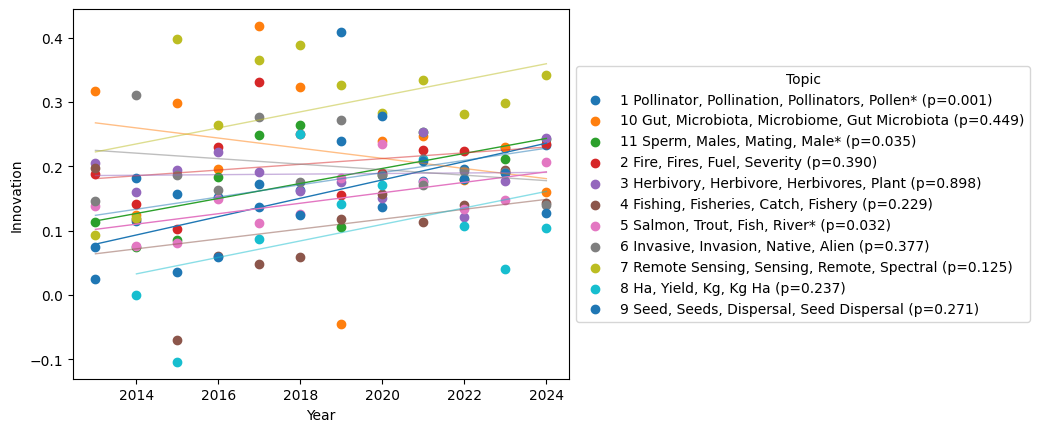

In [133]:
# Example grouped DataFrame
topics_inno_groups = topics_inno.groupby('pretty_topic')

# Initialize a dictionary to store significance information and p-values
significance_dict = {}

for name, group in topics_inno_groups:
    # Scatter plot
    plt.scatter(group['year'], group['compound'], label=name)
    
    # Fit regression line using statsmodels
    X = sm.add_constant(group['year'])  # Add constant for intercept
    model = sm.OLS(group['compound'], X).fit()
    p_value = model.pvalues[1]  # Extract p-value for the slope
    
    # Save significance and p-value information
    is_significant = p_value < 0.05  # True if p < 0.05
    significance_dict[name] = (is_significant, p_value)
    
    # Plot regression line with adjusted alpha
    coeffs = np.polyfit(group['year'], group['compound'], 1)  # Linear fit
    reg_line = np.polyval(coeffs, group['year'])
    alpha_value = 1.0 if is_significant else 0.5  # Full alpha if significant, else 0.5
    plt.plot(group['year'], reg_line, linewidth=1, alpha=alpha_value)

# Update legend labels with stars for significant topics and include p-values
legend_labels = [
    f"{name}{'*' if significance_dict[name][0] else ''} (p={significance_dict[name][1]:.3f})"
    for name in significance_dict.keys()
]
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, legend_labels, title="Topic", loc='center left', bbox_to_anchor=(1, 0.5))

# Labels and title
plt.xlabel('Year')
plt.ylabel('Innovation')
plt.show()

In [134]:
# which topics have gotten more or less innovative?

innovation_first_half = bert_results[bert_results['year'].isin([2013,2014,2015,2017,2018])].groupby('pretty_topic')['compound'].mean().reset_index()
innovation_second_half = bert_results[bert_results['year'].isin([2019,2020,2021,2022,2023])].groupby('pretty_topic')['compound'].mean().reset_index()



In [135]:
innovation_comp = pd.merge(innovation_first_half, innovation_second_half, on = "pretty_topic", how = "inner", suffixes = ["_2013_2018", "_2019_2023"])

In [136]:
innovation_comp['relative_d_innovation'] = (innovation_comp['compound_2019_2023'] - innovation_comp['compound_2013_2018']) / abs(innovation_comp['compound_2013_2018']) 

In [137]:
innovation_comp.sort_values(by = "relative_d_innovation", ascending= False)

,pretty_topic,compound_2013_2018,compound_2019_2023,relative_d_innovation
49,"54 Disease, Trichoderma, Fusarium, Fungicides",0.000000,0.131445,inf
42,"48 Wolves, Wolf, Coyotes, Prey",0.000441,0.170749,386.265133
67,"71 Peatland, Peatlands, Sphagnum, Peat",-0.030860,0.233840,8.577447
36,"42 Per Plant, Yield, Yield Per, Genotypes",0.067000,0.465142,5.942416
6,"15 Adsorption, Sorption, Ions, Wastewater",-0.032945,0.084835,3.575023
...,...,...,...,...
71,"75 Drought, Tree, Growth, Tree Growth",0.178194,0.050769,-0.715089
60,"65 Suitable, Distribution, Climate, Suitable H...",0.177080,0.025751,-0.854579
43,"49 Barcoding, Barcode, Dna, Barcodes",0.165346,0.009327,-0.943590
68,"72 Camera, Duiker, Mammal, Park",0.176600,-0.004913,-1.027821


In [138]:
innovation_infnan_removed = innovation_comp[np.logical_and(abs(innovation_comp['relative_d_innovation']) != np.inf, ~pd.isna(innovation_comp['relative_d_innovation']))]

gained_inno = innovation_infnan_removed.sort_values( by = 'relative_d_innovation', ascending= False).iloc[:10]
lost_inno = innovation_infnan_removed.sort_values( by = 'relative_d_innovation', ascending= False).iloc[-10:]

gained_inno_topics = list(gained_inno['pretty_topic'])
lost_inno_topics = list(lost_inno['pretty_topic'])

In [139]:
gained_inno.sort_values(by = "relative_d_innovation", ascending = False)

,pretty_topic,compound_2013_2018,compound_2019_2023,relative_d_innovation
42,"48 Wolves, Wolf, Coyotes, Prey",0.000441,0.170749,386.265133
67,"71 Peatland, Peatlands, Sphagnum, Peat",-0.030860,0.233840,8.577447
36,"42 Per Plant, Yield, Yield Per, Genotypes",0.067000,0.465142,5.942416
6,"15 Adsorption, Sorption, Ions, Wastewater",-0.032945,0.084835,3.575023
32,"39 Fire, Severity, Burnt, Unburnt",-0.062281,0.159587,3.562361
70,"74 Chloroplast, Genetic, China, Quaternary",0.039703,0.151061,2.804784
59,"64 Plumage, Coloration, Carotenoid, Color",0.053083,0.189831,2.576131
23,"30 Land, Ecological, Land Use, Habitat Quality",-0.433150,0.412102,1.951408
47,"52 Groundwater, Rainfall, Water, River",-0.236960,0.206016,1.869413
9,"18 Air, Pollution, Air Pollution, Air Quality",0.075225,0.183599,1.440660


In [140]:
lost_inno.sort_values(by = "relative_d_innovation", ascending = True)

,pretty_topic,compound_2013_2018,compound_2019_2023,relative_d_innovation
68,"72 Camera, Duiker, Mammal, Park",0.176600,-0.004913,-1.027821
43,"49 Barcoding, Barcode, Dna, Barcodes",0.165346,0.009327,-0.943590
60,"65 Suitable, Distribution, Climate, Suitable H...",0.177080,0.025751,-0.854579
71,"75 Drought, Tree, Growth, Tree Growth",0.178194,0.050769,-0.715089
56,"61 Forest, Regeneration, Woody, Tree",0.204744,0.060683,-0.703614
34,"40 Song, Noise, Songs, Vocal",0.281535,0.099063,-0.648132
66,"70 Waste, Concrete, Cement, Materials",0.144125,0.051081,-0.645577
26,"33 Turtles, Turtle, Nesting, Loggerhead",0.218285,0.081388,-0.627147
38,"44 Dung, Beetle, Dung Beetle, Beetles",0.175047,0.082817,-0.526888
15,"23 Ant, Ants, Ant Species, Efn",0.249738,0.121104,-0.515073


In [141]:
# These results are dependent upon the assumptions of the word dict I defined.
# Can we do a more agnostic lexical diversity analysis?

def ttr(abs):
    tokens = abs.lower().split()
    unique_tokens = set(tokens)
    ratio = len(unique_tokens) / len(tokens)
    return(ratio)

def cttr(abs):
    tokens = abs.lower().split()
    unique_tokens = set(tokens)
    ratio = len(unique_tokens) / math.sqrt(2*len(tokens))
    return(ratio)

def hc(abs):
    tokens = abs.lower().split()
    unique_tokens = set(tokens)
    ratio = np.log(len(unique_tokens))/np.log(len(tokens))
    return(ratio)

def maas_ttr(abs):
    tokens = abs.lower().split()
    unique_tokens = set(tokens)
    ratio = (np.log(len(tokens)) - np.log(len(unique_tokens)))/ (np.log(len(tokens))**2)
    return(ratio)

bert_results['ttr'] = bert_results['abstract'].apply(lambda x: ttr(x))
bert_results['cttr'] = bert_results['abstract'].apply(lambda x: cttr(x))
bert_results['hc'] = bert_results['abstract'].apply(lambda x: hc(x))
bert_results['maas_ttr'] = bert_results['abstract'].apply(lambda x: maas_ttr(x))

/tmp/ipykernel_15192/888963263.py:19: RuntimeWarning: invalid value encountered in scalar divide
  ratio = np.log(len(unique_tokens))/np.log(len(tokens))
/tmp/ipykernel_15192/888963263.py:25: RuntimeWarning: invalid value encountered in scalar divide
  ratio = (np.log(len(tokens)) - np.log(len(unique_tokens)))/ (np.log(len(tokens))**2)


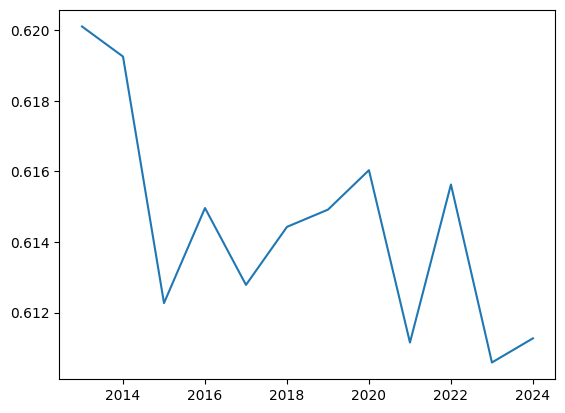

In [142]:
ttr_results = bert_results.groupby('year')["ttr"].mean()
plt.plot(ttr_results)
plt.show()

In [143]:
olsmodelttr = sm.OLS(list(ttr_results.values),sm.add_constant(list(ttr_results.index))).fit()
print(olsmodelttr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     7.783
Date:                Thu, 21 Nov 2024   Prob (F-statistic):             0.0191
Time:                        18:24:57   Log-Likelihood:                 56.434
No. Observations:                  12   AIC:                            -108.9
Df Residuals:                      10   BIC:                            -107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7465      0.406      4.304      0.0

/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.


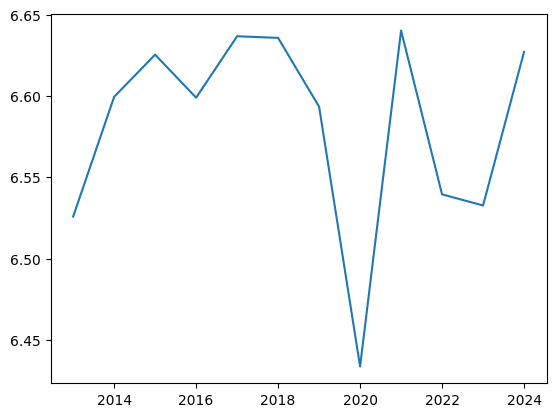

In [144]:
cttr_results = bert_results.groupby('year')["cttr"].mean()
plt.plot(cttr_results)
plt.show()

In [145]:
olsmodelcttr = sm.OLS(list(cttr_results.values),sm.add_constant(list(cttr_results.index))).fit()
print(olsmodelcttr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.087
Method:                 Least Squares   F-statistic:                    0.1161
Date:                Thu, 21 Nov 2024   Prob (F-statistic):              0.740
Time:                        18:25:01   Log-Likelihood:                 16.770
No. Observations:                  12   AIC:                            -29.54
Df Residuals:                      10   BIC:                            -28.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3511     11.061      0.936      0.3

/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.


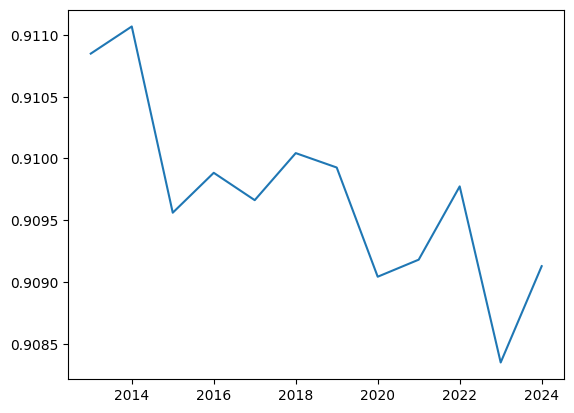

In [146]:
hc_results = bert_results.groupby('year')["hc"].mean()
plt.plot(hc_results)
plt.show()

In [147]:
olsmodelhc = sm.OLS(list(hc_results.values),sm.add_constant(list(hc_results.index))).fit()
print(olsmodelhc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     16.74
Date:                Thu, 21 Nov 2024   Prob (F-statistic):            0.00218
Time:                        18:25:07   Log-Likelihood:                 75.660
No. Observations:                  12   AIC:                            -147.3
Df Residuals:                      10   BIC:                            -146.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2442      0.082     15.219      0.0

/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.


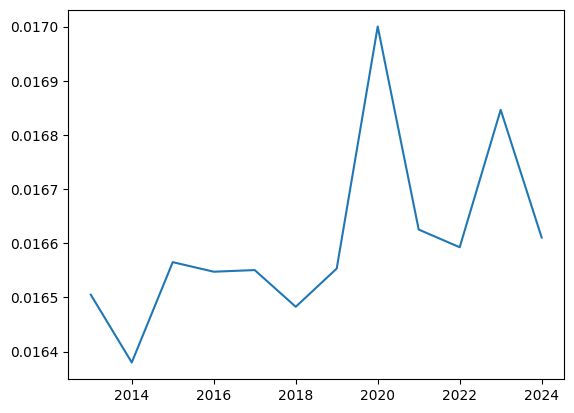

In [148]:
maas_ttr_results = bert_results.groupby('year')["maas_ttr"].mean()
plt.plot(maas_ttr_results)
plt.show()

In [149]:
olsmodelmaas_ttr = sm.OLS(list(maas_ttr_results.values),sm.add_constant(list(maas_ttr_results.index))).fit()
print(olsmodelmaas_ttr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     4.584
Date:                Thu, 21 Nov 2024   Prob (F-statistic):             0.0579
Time:                        18:25:13   Log-Likelihood:                 90.243
No. Observations:                  12   AIC:                            -176.5
Df Residuals:                      10   BIC:                            -175.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0353      0.024     -1.456      0.1

/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.


In [155]:
bert_results['readibility'] = bert_results['abstract'].apply(lambda x: flesch_kincaid_grade(x))

In [156]:
fkg_results = bert_results.groupby('year')['readibility'].mean()
fkg_results

year
2013    14.913081
2014    15.178095
2015    15.139941
2016    15.333654
2017    15.108261
2018    15.004297
2019    14.939500
2020    15.074388
2021    14.952845
2022    14.476393
2023    14.325128
2024    14.382159
Name: readibility, dtype: float64

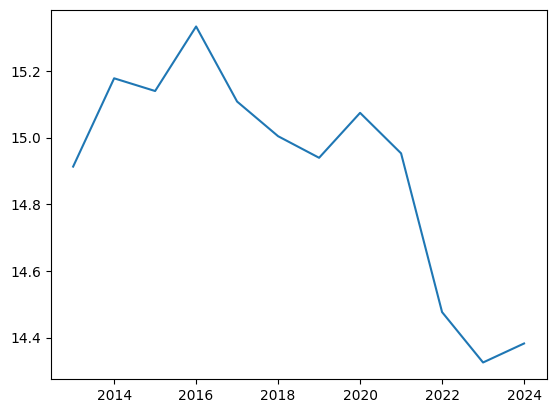

In [157]:
plt.plot(fkg_results)

In [169]:
fkg_results

year
2013    14.913081
2014    15.178095
2015    15.139941
2016    15.333654
2017    15.108261
2018    15.004297
2019    14.939500
2020    15.074388
2021    14.952845
2022    14.476393
2023    14.325128
2024    14.382159
Name: readibility, dtype: float64

In [173]:
compchart_data = {
    "labels": fkg_results.index.tolist(),
    "datasets": [
        {
            "label": "Complexity (Flesch-Kincaid Grade)",
            "data": fkg_results.values.tolist(),
            "borderColor": "rgba(75, 192, 192, 1)",
            "backgroundColor": "rgba(75, 192, 192, 0.2)",
            "fill": False
        }
    ]
}

with open('/workspaces/conservation-trends/complexity_trends.json', 'w') as file:
    json.dump(compchart_data, file, indent=4)

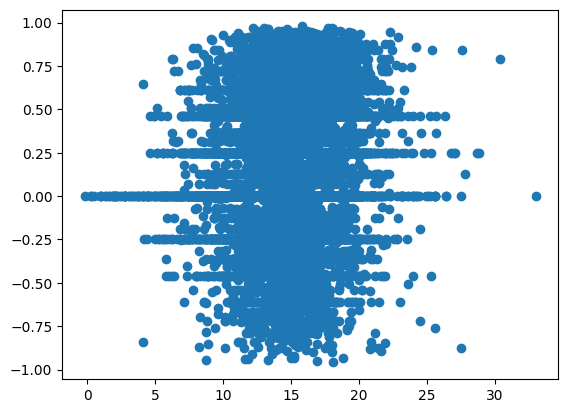

In [175]:
plt.scatter(bert_results['readibility'], bert_results['compound'])

In [ ]:
olsmodel_c_r = sm.OLS(list(bert_results['compound']),sm.add_constant(list(bert_results['readibility']))).fit()
print(olsmodel_c_r.summary())
# more innovative studies had more complexity 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     107.4
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           4.43e-25
Time:                        19:38:23   Log-Likelihood:                -6267.5
No. Observations:               13661   AIC:                         1.254e+04
Df Residuals:                   13659   BIC:                         1.255e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.017      1.154      0.2